# Proyecto 3 grupo 3
## Juan Felipe Herrera Rodriguez
## Carlos Fernando Gonzalez Sarmiento

# Punto 1 - Selección de variables

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df_bikes = pd.read_csv('/content/drive/MyDrive/SeoulBikeData.csv', 
                 sep = ';',
                 error_bad_lines=False
                 )
df_bikes.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,Rented Bike Count,Hour,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(?C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df = df_bikes.drop(['Hour', 'Dew point temperature(?C)', 'Functioning Day'], axis=1)
df.head()

,Rented Bike Count,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,Winter,No Holiday
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,Winter,No Holiday
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,Winter,No Holiday
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,Winter,No Holiday
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,Winter,No Holiday


##Matriz de correlación

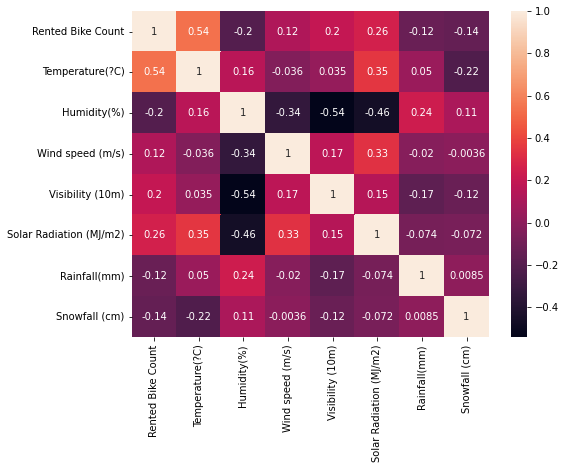

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
corr_df = df[["Rented Bike Count","Temperature(?C)","Humidity(%)","Wind speed (m/s)","Visibility (10m)","Solar Radiation (MJ/m2)","Rainfall(mm)", 
"Snowfall (cm)"]].corr(method='pearson')

plt.figure(figsize=(8, 6))
sns.heatmap(corr_df, annot=True)
plt.show()

Se realiza la matriz de correlacion ya que esta es indispensable para seleccionar variables numericas con un problema de regresión

In [ ]:
Seasons = pd.get_dummies(df['Seasons'],prefix = 'Seasons')
hol= pd.get_dummies(df['Holiday'],prefix = 'Holiday')
df1=df_bikes.drop(['Hour', 'Dew point temperature(?C)', 'Functioning Day','Seasons','Holiday'],axis=1)
df2=pd.concat([df1,Seasons,hol],axis=1)
df2.head()

,Rented Bike Count,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,1


In [ ]:
feature_cols = df2.columns[df2.columns.str.startswith('C') == False].drop("Rented Bike Count")
feature_cols


Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')

In [ ]:
X = df2[feature_cols]
y = df2['Rented Bike Count']
X

,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Holiday_Holiday,Holiday_No Holiday
0,-5.2,37,2.2,2000,0.0,0.0,0.0,0,0,0,1,0,1
1,-5.5,38,0.8,2000,0.0,0.0,0.0,0,0,0,1,0,1
2,-6.0,39,1.0,2000,0.0,0.0,0.0,0,0,0,1,0,1
3,-6.2,40,0.9,2000,0.0,0.0,0.0,0,0,0,1,0,1
4,-6.0,36,2.3,2000,0.0,0.0,0.0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,4.2,34,2.6,1894,0.0,0.0,0.0,1,0,0,0,0,1
8756,3.4,37,2.3,2000,0.0,0.0,0.0,1,0,0,0,0,1
8757,2.6,39,0.3,1968,0.0,0.0,0.0,1,0,0,0,0,1
8758,2.1,41,1.0,1859,0.0,0.0,0.0,1,0,0,0,0,1


#Anova

In [ ]:
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectKBest

fvalue_selector = SelectKBest(f_regression, k=8)
X_kbest_features = fvalue_selector.fit_transform(X, y)

# Obtener columnas para crear un nuevo dataframe con las nuevas variables
cols = fvalue_selector.get_support(indices=True)
features_df_new = X.iloc[:,cols]
print("Variables seleccionadas:")
print(features_df_new.dtypes)
print("")
print('Número original de variables: ', X.shape[1])
print('Número de variables seleccionadas: ', X_kbest_features.shape[1])

Variables seleccionadas:
Temperature(?C)            float64
Humidity(%)                  int64
Visibility (10m)             int64
Solar Radiation (MJ/m2)    float64
Rainfall(mm)               float64
Snowfall (cm)              float64
Seasons_Summer               uint8
Seasons_Winter               uint8
dtype: object

Número original de variables:  13
Número de variables seleccionadas:  8


Luego de ello se realiza una prueba anova para verificar que posibles variables cualitativas además de cuantitativas se pueden usar para el modelo, a criterio propio se decidió trabajar solo con 8 variables para que de algún modo si fuera viable utilizar este metodo.

#Selección hacia adelante

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=0)

X_train.shape, X_test.shape

((6132, 13), (2628, 13))

In [ ]:
!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.ensemble import RandomForestRegressor

sfs1 = SFS(RandomForestRegressor(), 
           k_features=8, 
           forward=True, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)

sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   18.8s finished

[2022-11-24 17:42:22] Features: 1/8 -- score: 0.23004724368339705[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   27.0s finished

[2022-11-24 17:42:49] Features: 2/8 -- score: 0.3188544361074395[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   29.5s finished

[2022-11-24 17:43:19] Features: 3/8 -- score: 0.49482845864883523[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
print("Variables originales dataset:", X_train.columns)
print("Variables seleccionadas :",X_train.columns[list(sfs1.k_feature_idx_)])

Variables originales dataset: Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')
Variables seleccionadas : Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Seasons_Autumn', 'Holiday_Holiday'],
      dtype='object')


Se realizó una selección hacia adelante con el fin de verificar cuales son las mejores 8 variables que hagan que el modelo posea un mejor r cuadrado para un mejor ajuste.

#Eliminación hacia atras

In [ ]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=8, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='r2',
           cv=3)
sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   55.1s finished

[2022-11-24 16:42:58] Features: 12/8 -- score: 0.6297211111281417[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   50.1s finished

[2022-11-24 16:43:48] Features: 11/8 -- score: 0.6298397040865119[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   44.8s finished

[2022-11-24 16:44:33] Features: 10/8 -- score: 0.628656158811935[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   

In [ ]:
print("Variables originales dataset:", X_train.columns)
print("Variables seleccionadas :",X_train.columns[list(sfs1.k_feature_idx_)])

Variables originales dataset: Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')
Variables seleccionadas : Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Seasons_Autumn', 'Holiday_No Holiday'],
      dtype='object')


De la misma manera se realizó una eliminación hacia atras con el fin de verificar cuales son las mejores 8 variables que hagan que el modelo posea un mejor r cuadrado para un mejor ajuste.
En comparación a la selección hacia adelante esta tecnica seleccionó "Holiday_No Holiday" como variable para incluir en el modelo es decir día no festivo, ahora bien, se realizará otra eliminacion hacía atrás con el fin de que se disminuya el error cuadratico medio y que nos proporcione las variables que minimice el error ya mencionado.

In [ ]:
sfs1 = SFS(RandomForestRegressor(), 
           k_features=8, 
           forward=False, 
           floating=False, 
           verbose=2,
           scoring='neg_mean_squared_error',
           cv=3)
sfs1 = sfs1.fit(np.array(X_train), y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  13 out of  13 | elapsed:   56.6s finished

[2022-11-24 16:49:03] Features: 12/8 -- score: -154809.10149878892[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:   51.5s finished

[2022-11-24 16:49:55] Features: 11/8 -- score: -155636.35767102087[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:   45.2s finished

[2022-11-24 16:50:40] Features: 10/8 -- score: -156228.09103339363[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Don

In [ ]:
print("Variables originales dataset:", X_train.columns)
print("Variables seleccionadas :",X_train.columns[list(sfs1.k_feature_idx_)])

Variables originales dataset: Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Snowfall (cm)', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer',
       'Seasons_Winter', 'Holiday_Holiday', 'Holiday_No Holiday'],
      dtype='object')
Variables seleccionadas : Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Seasons_Autumn', 'Holiday_No Holiday'],
      dtype='object')


Nuevamente nos vuelve a proporcionar la variable de día no festivo

#Variables

Finalmente seleccionamos las variables de Temperatura,Radiación solar, Visibilidad, Humedad, velocidad viento, seasons otoño, rainfall, no holiday, este ultimo ya que es el que aparece dos veces para disminuir el error cuadratico medio y aumentar el R^2, la temporada de oroño porque es la que se proporciona en ambas selecciones y decidimos dejar primordialmente lo que dijera acerca de el mejor r^2 y mejor RMSE, no hacerle caso a la anova

In [ ]:
df3=df2.drop(['Seasons_Spring',	'Seasons_Summer',	'Seasons_Winter',	'Holiday_Holiday','Snowfall (cm)'	], axis=1)
df3

,Rented Bike Count,Temperature(?C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Seasons_Autumn,Holiday_No Holiday
0,254,-5.2,37,2.2,2000,0.0,0.0,0,1
1,204,-5.5,38,0.8,2000,0.0,0.0,0,1
2,173,-6.0,39,1.0,2000,0.0,0.0,0,1
3,107,-6.2,40,0.9,2000,0.0,0.0,0,1
4,78,-6.0,36,2.3,2000,0.0,0.0,0,1
...,...,...,...,...,...,...,...,...,...
8755,1003,4.2,34,2.6,1894,0.0,0.0,1,1
8756,764,3.4,37,2.3,2000,0.0,0.0,1,1
8757,694,2.6,39,0.3,1968,0.0,0.0,1,1
8758,712,2.1,41,1.0,1859,0.0,0.0,1,1


# Punto 2 - Modelos de predicción

##SVR

In [ ]:
feature_cols = df3.columns[df3.columns.str.startswith('C') == False].drop("Rented Bike Count")
feature_cols

Index(['Temperature(?C)', 'Humidity(%)', 'Wind speed (m/s)',
       'Visibility (10m)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)',
       'Seasons_Autumn', 'Holiday_No Holiday'],
      dtype='object')

In [ ]:
X = df3[feature_cols]
y = df3['Rented Bike Count']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=69)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(6132, 8) (2628, 8) (6132,) (2628,)


In [ ]:
c_est = [0.1]
e= [0.1]
k=['poly']
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
svr = SVR(kernel ='poly' , C = 0.1 , epsilon =0.1)
svr.fit(X_train,y_train)
cv = KFold(n_splits=2, random_state=666, shuffle=True)
scores1 = cross_val_score(svr, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
scores2 = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
print('MAE K-fold:',abs(np.mean(scores1)))
print('RMSE K-fold:',np.sqrt(abs(np.mean(scores2))))

MAE K-fold: 0.07720863862837912
RMSE K-fold: 667.2188142486044


In [ ]:
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
c_est = [0.1, 1,1000]
e= [0.1, 1, 0.001]
ker=['poly','rbf']
b=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
df8=pd.DataFrame()

df8['C']=b
df8['epsilon']=b
df8['kernel']=b
df8['R^2']=b
df8['RMSE']=b


l=0
for k in ker:
  for i in c_est:
    for j in e:
      svr = SVR(kernel =k , C = i , epsilon =j)
      svr.fit(X_train,y_train)
      cv = KFold(n_splits=5, random_state=666, shuffle=True)
      scores1 = cross_val_score(svr, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
      scores2 = cross_val_score(svr, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
      df8.iloc[[l],0] = i 
      df8.iloc[[l],1] = j
      df8.iloc[[l],2] = k
      df8.iloc[[l],3]=np.mean(scores1)
      df8.iloc[[l],4]=np.sqrt(abs(np.mean(scores2)))
      l=l+1


In [ ]:
df8.sort_values(['R^2','RMSE'],ascending=[False,True])

,C,epsilon,kernel,R^2,RMSE
7,1000.0,1.000,poly,0.239648,560.606803
6,1000.0,0.100,poly,0.239556,560.639524
8,1000.0,0.001,poly,0.239503,560.658859
16,1000.0,1.000,rbf,0.224699,566.066192
17,1000.0,0.001,rbf,0.224666,566.076779
15,1000.0,0.100,rbf,0.224641,566.086770
13,1.0,1.000,rbf,-0.049915,658.630191
12,1.0,0.100,rbf,-0.050127,658.697399
14,1.0,0.001,rbf,-0.050147,658.704576
4,1.0,1.000,poly,-0.053709,659.840997


El mejor modelo es de C=1000, un epsilon de 1 y un kernel 'poly', ahora bien se usó el r^2 y la raiz de error cuadratico medio.

Mejoraría en mi modelo el r^2 ya que está muy por debajo de un buen r^2 esto probablemente sea porque al usar la regresion lasso en la entrega pasada esta nos decía que todas las variables eran importantes y a ninguan la dejaba con un coeficiente de cero y en esta entrega le quitamos algunas varaiables.

## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

n_est = [100, 150,200]
m_fe= [6,7,8]
cri=['squared_error','absolute_error']
b=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17]
df8=pd.DataFrame()

df8['n_estimadores']=b
df8['max_features']=b
df8['criterio']=b
df8['R^2']=b
df8['RMSE']=b
l=0
for k in cri:
  for i in n_est:
    for j in m_fe: 

      clf=RandomForestRegressor(n_estimators=i, max_features=j,criterion=k ,random_state=1,)
      clf.fit(X_train,y_train)
      cv = KFold(n_splits=2, random_state=666, shuffle=True)
      scores1 = cross_val_score(clf, X_train, y_train, scoring='r2', cv=cv, n_jobs=-1)
      scores2 = cross_val_score(clf, X_train, y_train, scoring='neg_mean_squared_error', cv=cv, n_jobs=-1)
      df8.iloc[[l],0] = i 
      df8.iloc[[l],1] = j
      df8.iloc[[l],2] = k
      df8.iloc[[l],3]=np.mean(scores1)
      df8.iloc[[l],4]=np.sqrt(abs(np.mean(scores2)))
      l=l+1

In [ ]:
df8.sort_values(['R^2','RMSE'],ascending=[False,True])

,n_estimadores,max_features,criterio,R^2,RMSE
15,200,6,absolute_error,0.602404,405.556792
12,150,6,absolute_error,0.601709,405.923901
6,200,6,squared_error,0.601544,405.937705
3,150,6,squared_error,0.599962,406.742297
7,200,7,squared_error,0.599724,406.849990
9,100,6,absolute_error,0.599566,407.010408
16,200,7,absolute_error,0.599462,407.020989
4,150,7,squared_error,0.598997,407.217368
13,150,7,absolute_error,0.597547,407.990283
0,100,6,squared_error,0.597480,408.013069


Se usaron las mismas metricas que el algoritmo svm para hacer una comparación es decir el R^2, y el RMSE, el mejor modelo tuvo 200 arboles, 6 características y un criterion de error medio absoluto.

De igual manera aunque el r^2 y el rmse hayan mejorado en comparacion a otro modelo le haría una mejora en el r^2, posiblemente dejando todas las variables.

# **El mejor modelo es el Random Forest**

## Punto 3

## Ensamblaje manual

In [ ]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

models = {'svr': SVR(kernel = 'poly', C = 1000 , epsilon =1),
          'rf': RandomForestRegressor(n_estimators=200, max_features=6,criterion="absolute_error",random_state=1, )}

In [ ]:
for model in models.keys():
    models[model].fit(X_train, y_train)

**Predicciones**

In [ ]:
y_pred = pd.DataFrame(index=X_test.index, columns=models.keys())
for model in models.keys():
    y_pred[model] = models[model].predict(X_test)
y_pred

,svr,rf
832,367.128232,291.9850
7868,684.324385,520.3950
178,261.250137,219.3375
2981,368.054842,76.1000
4193,1021.682927,1429.4850
...,...,...
5854,990.366919,1638.6375
8585,671.169638,895.2850
5476,513.095665,566.4250
2625,588.461393,530.2000


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

for model in models.keys():
    print(model,"RMSE: ", np.sqrt(mean_squared_error(y_pred[model], y_test)))
    print(model,"R^2: ", abs(r2_score(y_pred[model], y_test)))

svr RMSE:  558.3684169370579
svr R^2:  2.1795493267152533
rf RMSE:  384.66667803254546
rf R^2:  0.38390840319427244


**Error de la media de las predicciones**

In [ ]:
print("RMSE: ",np.sqrt(mean_squared_error(y_pred.mean(axis=1), y_test)))
print("R^2: ",abs(r2_score(y_pred.mean(axis=1), y_test)))

RMSE:  441.2744045003176
R^2:  0.4188735427659602


Para este punto, se optó por utilizar la técnica ensamblaje manual, dado que con esta técnica podiamos estimar diferentes tipos de módelos, que en nuestro caso seria la posibilidad de estimar un módelo SVR y un Random Forest. Además, esta técnica nos permitia diferntes combinaciones de funciones y parámetros de ajuste.

Por otro lado, luego de hacer la estimación del ensamblaje manual, se evidenció que empeoro con respecto a los módelos individuales (SVR y Random Forest, puesto que el mínimo error cuadrático medio y el mayor r cuadrado, se presento en la estimación del Random Forest.

Para este módelo se podria mejorar el r cuadrado, haciendolo la ejecución del ensamblaje manual con otras variables y adicionalmente, variar los parámetros de cada módelo individual.

Por último, el resultado final de las mejores métricas de cada modelo, se puede observar en la siguiente tabla:

In [ ]:
from prettytable import PrettyTable 

myTable = PrettyTable(["Modelo","R^2", "RMSE"]) 
  
myTable.add_row(["SVR", "0.239648","560.606803"]) 
myTable.add_row(["Random Forest", "0.602404","405.556792"]) 
myTable.add_row(["Ensamblaje manual", "0.418873"," 441.27440450"]) 

  
print(myTable)

+-------------------+----------+---------------+
|       Modelo      |   R^2    |      RMSE     |
+-------------------+----------+---------------+
|        SVR        | 0.239648 |   560.606803  |
|   Random Forest   | 0.602404 |   405.556792  |
| Ensamblaje manual | 0.418873 |  441.27440450 |
+-------------------+----------+---------------+
